# Project Design
## Lebanon Opposition Groups Websites Analysis
### Project Overview
#### Lebanon is considered a test lab for the larger Middle East. Crumbling under disasters, the country is at the brink of total collapse. After the October revolution, the public became unified against the corrupt government. The approaching 2022 elections revived the opposition groups’ shared goal for a functional state. The opposition movements, however, differ in their approach to achieve the goal. This project will attempt to gain insight into the opposition movements’ objectives through Data Mining. Data will be scraped from three opposition web sites using webscraping. Webscraping using HTML parser allows for retrieving text contents from websites and extracting words and their frequencies. Vector space model is then  utilized to generate document-term matrices, allowing for quantitative analysis that helps in highlighting the focus of each party, The project is trying to answer the research question: How are the different opposition parties similar and how do they differ in their vision for political and economical reform? What are their focus and priorities for Lebanon's recovery?
#### Note that the aim was to analyze eight parties' websites, but one only has a social media presence, and four websites use Arabic version only. An extension of the project would be to use google translate so the unincluded websites can be integrated in the analysis. 




### Dependencies

In [30]:
# Importing requests library for HTTP parsing
import requests
import urllib.request, urllib.error, urllib.parse

# Importing Beautiful Soup for parsing HTML
from bs4 import BeautifulSoup

# Importing matplotlib for plotting graph
import matplotlib.pyplot as plt

# Importing Natural Language Toolkit for cleaning and tokenizing the data
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk import word_tokenize

# Importing Regular Expression for cleaning the data
import re

# Importing libraries for word cloud generation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Importing libraries for counting frequencies
from collections import Counter

# Importing pandas for generating a data frame for the words of interests
import pandas as pd

# Importing libraries for mathematical operations
import numpy as np

# Importing Natural Language libraries for sentiment analysis

nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nada/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Collection
#### The data collection begins with making a dictionary of urls, and the pages of interest. Then, building on the code in exercise six, Beautiful Soup. I added the for loop to populate the soup from all urls. 

In [31]:
# Creating a dictionary of the urls and pages of interest
urls = { 
    'minteshreen': [
        'https://minteshreen.com/en',
        'https://minteshreen.com/en/what-we-stand-for/how-we-got-here',
        'https://minteshreen.com/en/what-we-stand-for/sovereignty',
        'https://minteshreen.com/en/what-we-stand-for/social-policies',
        'https://minteshreen.com/en/what-we-stand-for/a-civil-state'
     ],
      'mmfidawla' : [
        'https://mmfidawla.com/en',
        'https://mmfidawla.com/en/objectives/',
        'https://mmfidawla.com/en/methodology/'
        'https://mmfidawla.com/en/2019/12/08/political-transition-03/',
        'https://mmfidawla.com/en/2019/12/09/political-transition-17/', 
        'https://mmfidawla.com/en/2019/12/09/political-transition-26/'

      ],
      'nationalbloc' : [
         'https://en.nationalbloc.org',
         'https://en.nationalbloc.org/values',
         'https://en.nationalbloc.org/our_vision_social_justice_basic_services',
         'https://en.nationalbloc.org/axes_of_work',
         'https://en.nationalbloc.org/rescue_solution_forming_an_independent_and_sovereign_government_of_competent_specialists',
         'https://en.nationalbloc.org/ministerial_statement'
      ]
}

# Populating the soup using requests and a for loop
soups = {}

user_agent = {'User-agent': 'Mozilla/5.0'}


for key in urls.keys():
    soups[ key ] = []
    for url in urls[key]:
        response = requests.get(url, headers = user_agent)
        soups[key].append( response.text )
             

### Processing
#### Cleaning the data using regular expression using the code from exercise thirteen, Twitter Stream. The data is then stored in a dictionaries for the relevant urls.

In [37]:
# Using regular expression to remove symbols and unwanted characters
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#', '[^\x00-\x7F]', 'x+|[0-9]+', 'u+|[0-9]+']
combined_re = re.compile( '|'.join( re_list) )


# Creating a function for cleaning the urls with the WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_urls(u):
    del_amp = BeautifulSoup(u, 'html.parser')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

# Creating loops to transfer cleaned urls into word bags, then into dictionaries
cleaned_urls = {}
word_bag = {}
dicts = {}
for key in soups.keys():
    cleaned_urls[key] = []
    word_bag[key] = []
    dicts[key] = []
    for i in range(0, len(soups[key]) ):
        cleaned_urls[key].append(cleaning_urls((soups[key][i])))
        word_bag[key].append( ','.join(str(cleaned_urls[key]).split())) 
        dicts[key].append(dict(Counter(word_bag[key][0].split(','))))



#### Building a data frame of the document term matrix using the code from exercise seven, Textual Analysis.
##### Note that there are typos like the word jstice instead of justice, however these typos don't appear on the website. Looking into this so far did not get me answers, but should learn more for future work.

In [38]:
# Creating a list of words of interest
vocabulary = ["citizens", "law", "state", "jstice", "progressive", 'transparency', 'social', 'reforms', 'economic']

# Building a document term matrix for each vocabulary in each dictionary
matrix = []
for vocab in vocabulary:
    word_count = []
    for key in dicts.keys():
        if vocab in dicts[key][0]:
            word_count.append(dicts[key][0][vocab])
        else:
            word_count.append( 0 )       
    matrix.append(  word_count )

# Creating a data frame using pandas to compare the occurrence of each word across all three urls
df = pd.DataFrame(matrix, index = vocabulary, columns = dicts.keys())

df

,minteshreen,mmfidawla,nationalbloc
citizens,2,5,9
law,3,0,19
state,6,10,22
jstice,5,0,9
progressive,1,0,0
transparency,0,0,2
social,8,1,6
reforms,1,0,2
economic,1,0,5


### Analysis

#### Calculate the Euclidean Distance between the documents using the code from exercise seven, Textual Analysis

In [46]:
# Creating a function for calculating the Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Creating a loop to iterate through the words of interest
url_titles = list(dicts.keys())

for i in range(len(vocabulary)):
    minteshreen = np.array( matrix[i][0] )
    mmfidawla  = np.array( matrix[i][1] )
    nationalbloc = np.array( matrix[i][2] )
    minteshreenmmfidawla = euclidean_distance (minteshreen , mmfidawla)

# Printing the Euclidean distances between the three urls texts for all words of interest
    print('Euclidean distance for the word [' + vocabulary[ i ] + ']')
    print(' in [' + url_titles[ 0 ] + '] vs. [' + url_titles [ 1 ][:23] + f']: { minteshreenmmfidawla:.2f}')

    minteshreennationalbloc = euclidean_distance(minteshreen, nationalbloc)
    print(' in [' + url_titles[ 0 ] + '] vs. [' + url_titles [ 2 ] + f']: { minteshreennationalbloc:.2f}')
 
    mmfidawlanationalbloc = euclidean_distance(mmfidawla, nationalbloc)
    print(' in [' + url_titles[ 1 ][:24] + '] vs. [' + url_titles [ 2 ] + f']: {mmfidawlanationalbloc:.2f}')

    print('\n')



Euclidean distance for the word [citizens]
 in [minteshreen] vs. [mmfidawla]: 3.00
 in [minteshreen] vs. [nationalbloc]: 7.00
 in [mmfidawla] vs. [nationalbloc]: 4.00


Euclidean distance for the word [law]
 in [minteshreen] vs. [mmfidawla]: 3.00
 in [minteshreen] vs. [nationalbloc]: 16.00
 in [mmfidawla] vs. [nationalbloc]: 19.00


Euclidean distance for the word [state]
 in [minteshreen] vs. [mmfidawla]: 4.00
 in [minteshreen] vs. [nationalbloc]: 16.00
 in [mmfidawla] vs. [nationalbloc]: 12.00


Euclidean distance for the word [jstice]
 in [minteshreen] vs. [mmfidawla]: 5.00
 in [minteshreen] vs. [nationalbloc]: 4.00
 in [mmfidawla] vs. [nationalbloc]: 9.00


Euclidean distance for the word [progressive]
 in [minteshreen] vs. [mmfidawla]: 1.00
 in [minteshreen] vs. [nationalbloc]: 1.00
 in [mmfidawla] vs. [nationalbloc]: 0.00


Euclidean distance for the word [transparency]
 in [minteshreen] vs. [mmfidawla]: 0.00
 in [minteshreen] vs. [nationalbloc]: 2.00
 in [mmfidawla] vs. [nationa

#### Sentiment Analysis based on the code in exercise twelve, Sentiment.

In [502]:
# Initializing Vader to use on the cleaned urls
sid = SentimentIntensityAnalyzer()

# the variable 'message_text' will contain the text to be analyzed.
# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
for  url_key in cleaned_urls.keys():
    message_text = str(cleaned_urls[url_key])
    scores = sid.polarity_scores(message_text)
    print(url_key)
    for key in sorted(scores):
        print('\t{0}: {1}, '.format(key, scores[key]), end='')
    print()

minteshreen
	compound: 0.9993, 	neg: 0.034, 	neu: 0.853, 	pos: 0.113, 
mmfidawla
	compound: 0.999, 	neg: 0.052, 	neu: 0.854, 	pos: 0.095, 
nationalbloc
	compound: 0.9997, 	neg: 0.05, 	neu: 0.846, 	pos: 0.104, 


#### Polarity Scores for Selected Sentences modeled after the code in exercise twelve, Sentiment. 

In [53]:
sid = SentimentIntensityAnalyzer()



# Initializing 'english.pickle' function and give it a short name

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
# Loading message_text with a short paragraph from the url "minteshreen" about their vision for an innovative economy
message_text = "Our program proposes an economic policy built on a citizen-centered vision that takes into account both the present and the future.This policy is based on a free, productive and innovative economy that focuses on the diversification of resources, the activation of the agricultural and industrial sectors, and the development of proper infrastructure, in order to develop the technological sector as well as a knowledge economy. Changing the structure of the economy to transform it from a rentier economy to a productive innovative economy requires the adoption of progressive economic, financial and tax policies."
# Breaking up the paragraph into a list of strings. 
sentences = tokenizer.tokenize(message_text)

# Iterating through the list of sentences and calculating and printing polarity scores for each one.

for sentence in sentences:
        print(sentence)
        scores = sid.polarity_scores(sentence)
        for key in sorted(scores):
                print('{0}: {1}, '.format(key, scores[key]), end='')
        print()

Our program proposes an economic policy built on a citizen-centered vision that takes into account both the present and the future.This policy is based on a free, productive and innovative economy that focuses on the diversification of resources, the activation of the agricultural and industrial sectors, and the development of proper infrastructure, in order to develop the technological sector as well as a knowledge economy.
compound: 0.8519, neg: 0.0, neu: 0.849, pos: 0.151, 
Changing the structure of the economy to transform it from a rentier economy to a productive innovative economy requires the adoption of progressive economic, financial and tax policies.
compound: 0.4404, neg: 0.0, neu: 0.896, pos: 0.104, 


### Visualization
#### Plot the data frame matrix of the words of interest

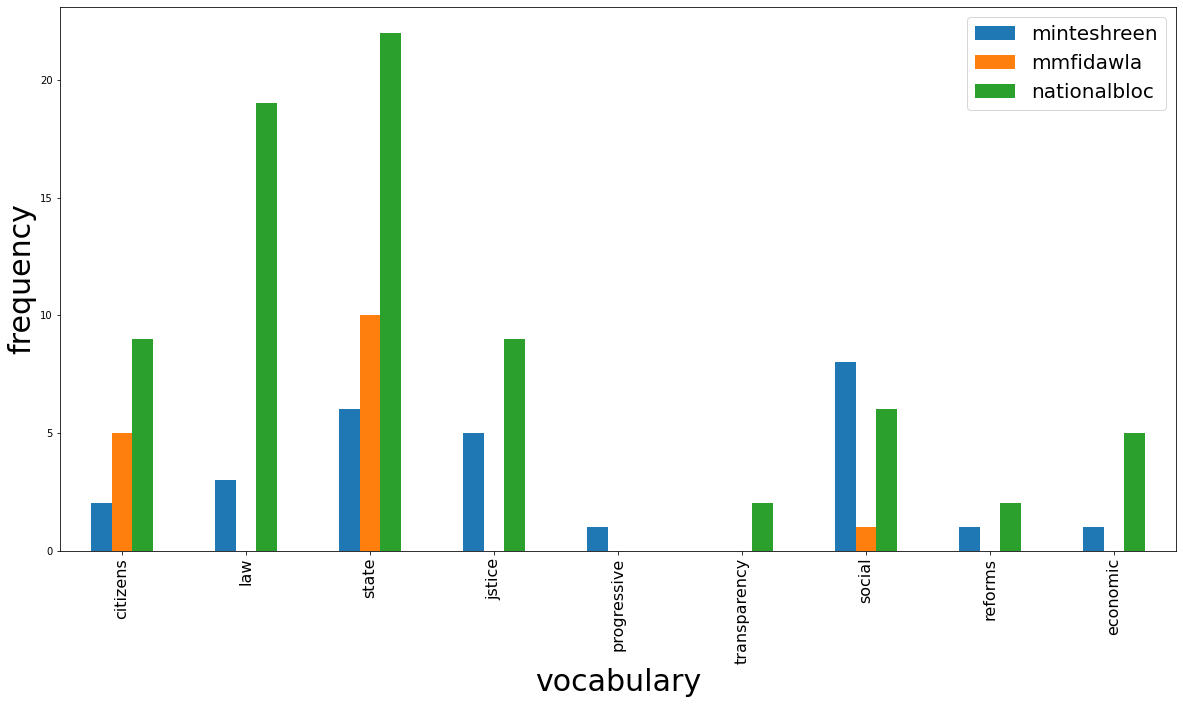

In [67]:
# Plotting the data frame matrix of vocabulary
df = pd.DataFrame(matrix, index = vocabulary,columns = dicts.keys())
# Setting up the figure 

ax= df.plot.bar(figsize=(20, 10))
ax.set_xlabel('vocabulary', fontsize=30)
ax.set_ylabel('frequency', fontsize=30)
plt.xticks(fontsize=16)
plt.legend(fontsize = 20)
plt.show()

#### Word Cloud for each url.

minteshreen


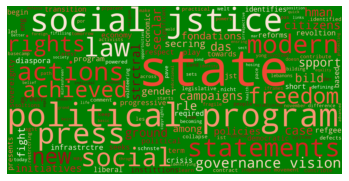

mmfidawla


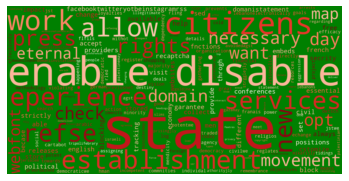

nationalbloc


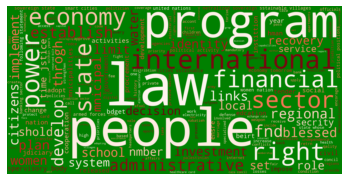

In [78]:
# Defining stopwords using library and a set update
stopwords = set(STOPWORDS)
stopwords.update(['truetype', 'home','lebanon','volnteer', 'got', 'email', 'volunteer', 'video', 'let', 'contact','jne','may','pblic','member', 'story', 'abot','find', 'join','lebanese', 'minteshreen', 'national', 'bloc', 'party','donate', 'read', 'become', 'settings', 'site', 'cookie', 'browser', 'setting', 'monir', 'will', 'analytics', 'google', 'click', 'yor', 'website', 'cookies', 'measre', 'sorce', 'plugin', 'https', 'f', 'font', 'null', 'input', 'image', 'mmfidawla', 'aviacookierefused','searchaction', 'function', 'l', 't', 'a','of','the','is', 'an', 'it', 'm', 'by', 'this', 'in', 'on', 's', 'i', 'over', 'and', 'or', 'to'])
df = pd.DataFrame(matrix, index = vocabulary,columns = dicts.keys())

# Plotting the wordcloud for 
for key in soups.keys():
    wordcloud = WordCloud(width=1600, height=800, background_color='green', colormap="Reds", stopwords=stopwords).generate(word_bag[key][0])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    print (key)
    plt.show()


#### This project gives an idea on the different messages the three opposition websites are offering. The first one, Minteshreen, seems to be more focused on social justice while maintaining a balanced overview. The second, MmFiDawla, is more concerned with the structure of the state and its citizens. The third, National Bloc, maintains a balanced outlook while prioritizing law and justice. The sentiment analysis of the three websites shows enthusiasm and positivity mostly at Minteshreen, reflecting its popularity among younger generations. 
#### The project can be further extended to include more analytical aspect such as topic modeling. It can also analyze a specific political area more in depth to pick up important nuances.
